In [27]:
import numpy as np
import pandas as pd
import datetime

import pandas_datareader # install with `pip install pandas-datareader`
from dstapi import DstApi # install with `pip install git+https://github.com/alemartinello/dstapi`

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

We wish to look at how Danish wealth is made up. We use the table FORMUE11 to look at this.

In [28]:
#We import the data using the DST API. We then display a table to summarize the data
wealth = DstApi('FORMUE12')
tabsum = wealth.tablesummary(language='en')
display(tabsum)
# pd.set_option('display.max_rows', None) #This ensures that we see all the places. Useful for selecting the data we want to use.
#We show the contents of the table in more detail.
for variable in tabsum['variable name']:
    print(variable+':')
    display(wealth.variable_levels(variable, language='en'))


Table FORMUE12: Wealth by type of wealth, unit, region, age, population and time
Last update: 2023-11-29T08:00:00


,variable name,# values,First value,First value label,Last value,Last value label,Time variable
0,FORM1,46,FGNF2020,"Net Wealth, (2020-definition A+B+CX-D-E-F)",FGF4,F.4. Other debt to the public sector,False
1,ENHED,9,200,Median (Constant prices 2021-level),240,Number of people in population 31.12,False
2,OMRÅDE,104,000,All Denmark,851,Aalborg,False
3,ALDER,5,1802,18 years and over,7099,70 years and over,False
4,POPU,2,5005,Entire population,5025,Only people with the selected type of wealth,False
5,Tid,9,2014,2014,2022,2022,True


FORM1:


,id,text
0,FGNF2020,"Net Wealth, (2020-definition A+B+CX-D-E-F)"
1,FGNF2014,"Net Wealth, (2014-definition A+B-B6+CX-D-E-F+F3)"
2,FGAK2020,Assets total (2020-definition A+B+CX)
3,FGAK2014,Assets total (2014-definition A+B+CX-B6)
4,FGA,A. Real assets
5,FGA1,A.1. Value of Main residence
6,FGA2,A.2. Value of flat in housing co-operative
7,FGA3,A3. Value of vacation cottage
8,FGA4,"A.4. Other real estate (rental dwelling, unbui..."
9,FGA5,A.5. Cars


ENHED:


,id,text
0,200,Median (Constant prices 2021-level)
1,205,Lower quartile (Constant prices 2021-leel)
2,210,Upper quartile (Constant prices 2021-level)
3,215,Average (Constant prices 2021-level)
4,220,Median (Nominal prices)
5,225,Lower quartile (Nominal prices)
6,230,Upper quartile (Nominal prices)
7,235,Average (Nominal prices)
8,240,Number of people in population 31.12


OMRÅDE:


,id,text
0,000,All Denmark
1,084,Region Hovedstaden
2,101,Copenhagen
3,147,Frederiksberg
4,155,Dragør
...,...,...
99,773,Morsø
100,840,Rebild
101,787,Thisted
102,820,Vesthimmerlands


ALDER:


,id,text
0,1802,18 years and over
1,1829,18-29 years
2,3049,30-49 years
3,5069,50-69 years
4,7099,70 years and over


POPU:


,id,text
0,5005,Entire population
1,5025,Only people with the selected type of wealth


Tid:


,id,text
0,2014,2014
1,2015,2015
2,2016,2016
3,2017,2017
4,2018,2018
5,2019,2019
6,2020,2020
7,2021,2021
8,2022,2022


In [31]:
# The _define_base_params -method gives us a nice template (selects all available data)
params = wealth._define_base_params(language='en')
params

variables = params['variables'] # Returns a view, that we can edit
variables[0]['values'] = ['FGA5', 'FGC', 'FGB2014', 'FGB1']
variables[1]['values'] =['235','240']
variables[2]['values'] = ['101', '751', '153', '376', '183', '482', '730', '760', '810']
variables[3]['values'] = ['1802']
variables[4]['values'] = ['5005', '5025']
params

#And now we load the data while checking that it looks somewhat correct.
wealth_api = wealth.get_data(params=params)

#We now rename the variables such that it is easier to use.
var_dict = {} # var is for variable
var_dict['A.5. Cars'] = 'Cars'
var_dict['C. Pensions in total'] = 'Pensions'
var_dict['B. Financial assets, total (2014-definition ex...'] = 'Financial wealth'
var_dict['B.1. Deposits in bank'] = 'Deposits'
column_dict = {'FORM1': 'Variable', 'ENHED': 'Unit', 'OMRÅDE': 'Area', 'ALDER': 'Age', 'POPU': 'Population', 'TID': 'Year', 'INDHOLD': 'Value'}
wealth_api = wealth_api.rename(columns=column_dict)
wealth_api = wealth_api.rename(index=var_dict)      
plot_data = wealth_api.set_index('Year')
wealth_api.head(5)

,Variable,Unit,Area,Age,Population,Year,Value
0,A.5. Cars,Average (Nominal prices),Copenhagen,18 years and over,Entire population,2014,13157
1,A.5. Cars,Average (Nominal prices),Copenhagen,18 years and over,Only people with the selected type of wealth,2014,63109
2,A.5. Cars,Average (Nominal prices),Brøndby,18 years and over,Entire population,2014,26575
3,A.5. Cars,Average (Nominal prices),Brøndby,18 years and over,Only people with the selected type of wealth,2014,72830
4,A.5. Cars,Average (Nominal prices),Ishøj,18 years and over,Entire population,2014,26976


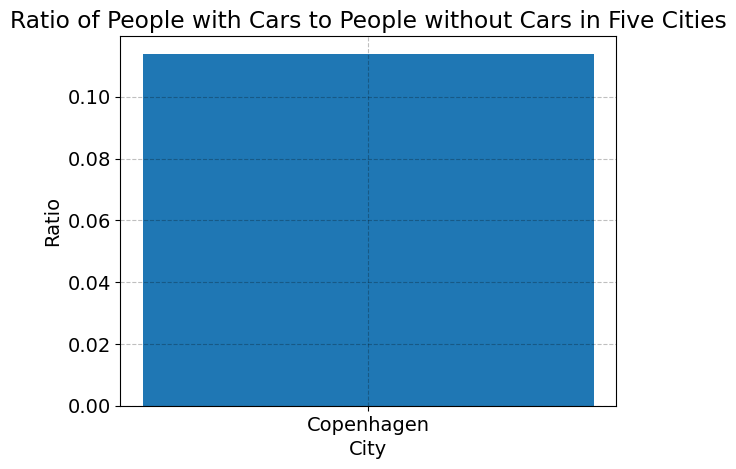

In [ ]:
# Calculate the ratio of people with cars to people without cars
ratio = plot_data[plot_data['Variable'] == 'A.5. Cars']['Value'] / plot_data[plot_data['Variable'] != 'A.5. Cars']['Value']

# Get the five cities
cities = plot_data[plot_data['Variable'] == 'A.5. Cars']['Area'].unique()[:5]

# Plot the ratio for each city
plt.bar(cities, ratio[:5])
plt.xlabel('City')
plt.ylabel('Ratio')
plt.title('Ratio of People with Cars to People without Cars in Five Cities')
plt.show()